# Height And Weight Prediction

In [1]:
#Importing necessary Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the file
df = pd.read_excel('/content/heightandweightdataset.xlsx') 

## Data Analysis

In [3]:
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [4]:
df.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [5]:
#Checking for null values
df.isnull().sum()

Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  25000 non-null  float64
 1   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


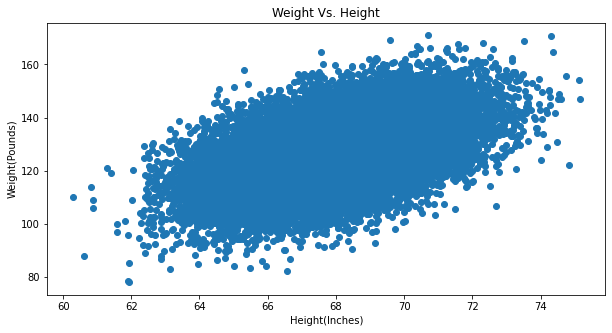

In [7]:
#Scatter plot of Weight Vs. Height
plt.figure(figsize = (10,5))
plt.title('Weight Vs. Height')
plt.xlabel('Height(Inches)')
plt.ylabel('Weight(Pounds)')
plt.scatter(df['Height(Inches)'], df['Weight(Pounds)'])
plt.show()

### Outlier Detection

In [8]:
Q1 = df['Height(Inches)'].quantile(0.25)
Q3 = df['Height(Inches)'].quantile(0.75)
Q1, Q3

(66.7043975, 69.2729575)

In [9]:
IQR = Q3 - Q1
IQR

2.568560000000005

In [10]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(62.85155749999999, 73.1257975)

In [11]:
df_new = df[(df['Height(Inches)']>lower_limit)&(df['Height(Inches)']<upper_limit)]
data = pd.DataFrame(df_new)
data.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


### Creating Train and Test Dataset

In [12]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [13]:
X

array([[65.78331],
       [71.51521],
       [69.39874],
       ...,
       [64.69855],
       [67.52918],
       [68.87761]])

In [14]:
y

array([112.9925, 136.4873, 153.0269, ..., 118.2655, 132.2682, 124.8742])

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

## Models

In [16]:
#Importing packages for error analysis
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [17]:
#Lists for storing Model Name, Score and Errors of respective models
models=[]
scores=[]
errors=[]

### Linear Regression


In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

lr_score = r2_score(y_test, lr_pred)
lr_error = np.sqrt(mean_squared_error(y_test, lr_pred))

In [19]:
lr_score

0.24005846522508278

In [20]:
lr_error

10.134584974575208

In [21]:
models.append('Linear Regression')
scores.append(lr_score)
errors.append(lr_error)

### GradientBoosting Regression

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr_pred = gbr.predict(x_test)

gbr_score = r2_score(y_test, gbr_pred)
gbr_error = np.sqrt(mean_squared_error(y_test, gbr_pred))

In [23]:
gbr_score

0.23821195662359274

In [24]:
gbr_error

10.146890029418351

In [25]:
models.append('GradientBoosting Regression')
scores.append(gbr_score)
errors.append(gbr_error)

### Support Vector Regression

In [26]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
svr_pred = svr.predict(x_test)

svr_score = r2_score(y_test, svr_pred)
svr_error = np.sqrt(mean_squared_error(y_test, svr_pred))


In [27]:
svr_score

0.2395111880783095

In [28]:
svr_error

10.138233563499407

In [29]:
models.append('SVR')
scores.append(svr_score)
errors.append(svr_error)

### Randomforest Regression

In [30]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

rfr.fit(x_train,y_train)
rfr_pred = rfr.predict(x_test)

In [31]:
rfr_score = r2_score(y_test,rfr_pred)
rfr_error = np.sqrt(mean_squared_error(y_test,rfr_pred))

In [32]:
rfr_score

-0.08707695726311404

In [33]:
rfr_error

12.121211318044224

Since, R squared Score is negative, that means our model has a bad fit.

In [34]:
# models.append('Randomforest Regression')
# scores.append(rfr_score)
# errors.append(rfr_error)

### KNN Regression

In [35]:
from sklearn.neighbors import KNeighborsRegressor


In [36]:
error_knn = []

for i in range(1, 100, 2):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    knn_pred_i = knn.predict(x_test)  
    error_knn.append(np.sqrt(mean_squared_error(y_test, knn_pred_i)))


In [37]:
error_knn

[14.081410341747587,
 11.625412268309674,
 11.040099726765547,
 10.753506382794107,
 10.616840592100923,
 10.53354169702199,
 10.456540249360618,
 10.418961306239346,
 10.403546053793491,
 10.373781499149173,
 10.346281817570333,
 10.337432130521796,
 10.317655125040364,
 10.307543258848021,
 10.289359761272614,
 10.280051861322441,
 10.269662381315646,
 10.25885184822742,
 10.25355180043255,
 10.24219838467663,
 10.235699350257594,
 10.230190458701413,
 10.22382471620067,
 10.213019467738144,
 10.20814184175828,
 10.207294482487129,
 10.206533877781782,
 10.207338473562528,
 10.200960032693354,
 10.196385397919856,
 10.193490680750811,
 10.197696890457717,
 10.19766524412835,
 10.198553592286235,
 10.192437606496977,
 10.189817942358799,
 10.188094404179049,
 10.184219998605691,
 10.182546719799081,
 10.179335886478325,
 10.175745731146284,
 10.175589494160535,
 10.17817913590739,
 10.178859994154926,
 10.175717761074393,
 10.176421787047659,
 10.174780668407244,
 10.17142379487218,
 

In [38]:
iteration = error_knn.index(min(error_knn))
iteration

47

In [39]:
#error_knn[47] occurs for K Value (n_neighbours) = 95

MSE for our model is minimum when K value is 95



Text(0, 0.5, 'RMSE')

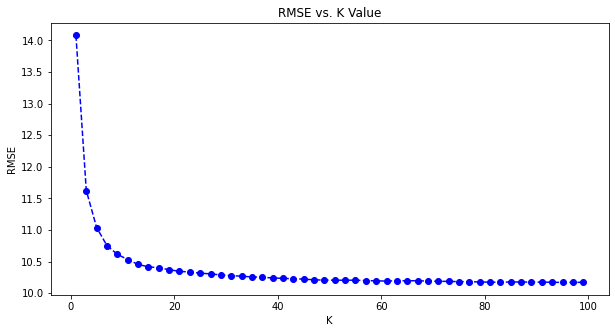

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(range(1,100,2), error_knn, color='blue', linestyle = 'dashed', marker = 'o')
plt.title('RMSE vs. K Value')
plt.xlabel('K')
plt.ylabel('RMSE')

In [41]:
knn = KNeighborsRegressor(n_neighbors = 95)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

In [42]:
knn_score = r2_score(y_test, knn_pred)
knn_error = np.sqrt(mean_squared_error(y_test, knn_pred))

In [43]:
knn_score

0.23452370860563865

In [44]:
knn_error

10.17142379487218

In [45]:
models.append('KNN Regression')
scores.append(knn_score)
errors.append(knn_error)

## Error Metrics

In [46]:
scores

[0.24005846522508278,
 0.23821195662359274,
 0.2395111880783095,
 0.23452370860563865]

In [47]:
errors

[10.134584974575208, 10.146890029418351, 10.138233563499407, 10.17142379487218]

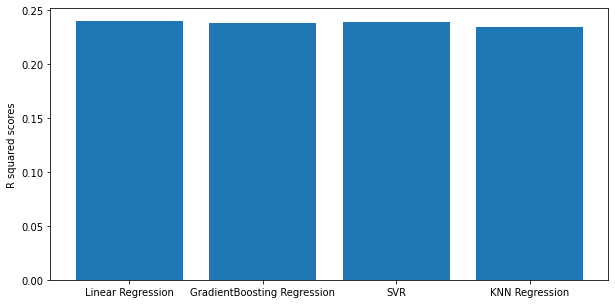

In [48]:
plt.figure(figsize=(10,5))
plt.bar(models, scores)
plt.ylabel('R squared scores')
plt.show()

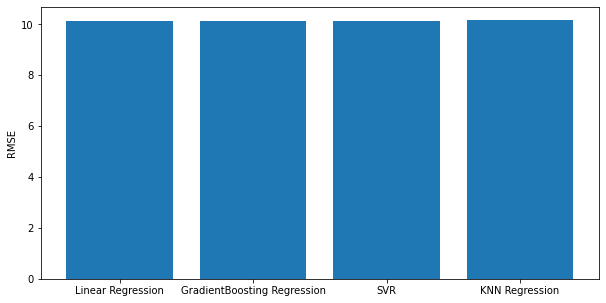

In [49]:
plt.figure(figsize=(10,5))
plt.bar(models, errors)
plt.ylabel('RMSE')
plt.show()

All of the models have roughly the same accuracy.